Tokenization is used to prepare language data for further use. The process involves breaking larger textbody into smaller units.
These tokens can then be further processed and fed into different NLP processes.

In [5]:
#import necessary libraries and modules
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

#sample paragraph
text = ' In restless dreams, I walked alone. Narrow streets of cobblestone. Neath the halo of a street lamp.I turned my collar to the cold and damp. When my eyes were stabbed by the flash of a neon light, that split the night, and touched the sound of silence '

#Tokenize by sentence 
sentence_tokens = sent_tokenize(text)
print(sentence_tokens)

#Tokenize by words
word_tokens = word_tokenize(text)
print(word_tokens)

[' In restless dreams, I walked alone.', 'Narrow streets of cobblestone.', 'Neath the halo of a street lamp.I turned my collar to the cold and damp.', 'When my eyes were stabbed by the flash of a neon light, that split the night, and touched the sound of silence']
['In', 'restless', 'dreams', ',', 'I', 'walked', 'alone', '.', 'Narrow', 'streets', 'of', 'cobblestone', '.', 'Neath', 'the', 'halo', 'of', 'a', 'street', 'lamp.I', 'turned', 'my', 'collar', 'to', 'the', 'cold', 'and', 'damp', '.', 'When', 'my', 'eyes', 'were', 'stabbed', 'by', 'the', 'flash', 'of', 'a', 'neon', 'light', ',', 'that', 'split', 'the', 'night', ',', 'and', 'touched', 'the', 'sound', 'of', 'silence']


What word tokenizer does, is split up the words in the text into individual elements within the list.
The sentence tokenizer splits up the sentences into elements.
Punctuation is included as elements in the list as well as clitics e.g., the 's in it's.

In [6]:
#create frequency dictionaries of generated tokens to help us visualize the results

from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#instantiate a frequency dictionary
fdist = FreqDist()
#count frequencies of words in sample text
for word in word_tokenize(text):
    fdist [word.lower()] += 1

In [7]:
print (fdist.most_common(5))

[('the', 5), ('of', 4), (',', 3), ('.', 3), ('a', 2)]


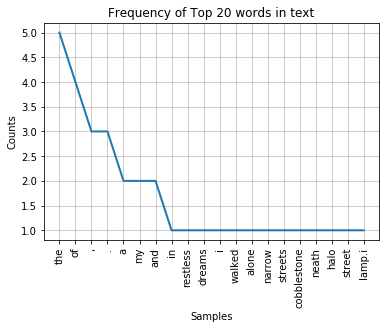

In [8]:
#look at distribution of frequencies of top 20 words
fdist.plot(20, title = 'Frequency of Top 20 words in text')
plt.show()

In [9]:
import pandas as pd

In [29]:
df = pd.read_csv('DisneylandReviews.csv', encoding = 'iso-8859-1')

In [30]:
#df = df.head()

In [31]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


In [32]:
#make a list to store all the tokenized reviews
review_tokens = []
for review in df['Review_Text']:
    word_tokens = word_tokenize(review)
    review_tokens.append(word_tokens)

In [33]:
#create a new column containing the tokenized reviews and print an example review
df['Token_Review'] = review_tokens
print ('Original Review: \n' +df.loc[0, 'Review_Text'])
print ('\nTokenized Review: ')
print (df.loc[0, 'Token_Review'])

Original Review: 
If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 

Tokenized Review: 
['If', 'you', "'ve", 'ever', 'been', 'to', 'Disneyland', 'anywhere', 'you', "'ll", 'find', 'Disneyland', 'Hong', 'Kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main', 'street', '!', 'It', 'has', 'a', 'very', 'familiar', 'feel', '.', 'One', 'of', 'the', 'rides', 'its', 'a', 'Small', 'World', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', '.', 'The', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well', '.']


In [34]:
#create frequency dictionary object
disney_fdist = FreqDist()
#cycles through each review and counts frequencies
for token_rev in df['Token_Review']:
    for word in token_rev:
        disney_fdist[word.lower()] +=1

Ten most common words and their frequencies:
[('the', 309580), ('.', 256998), ('and', 177114), (',', 173287), ('to', 164222), ('a', 127564), ('of', 90123), ('we', 88669), ('it', 85244), ('in', 81213)]


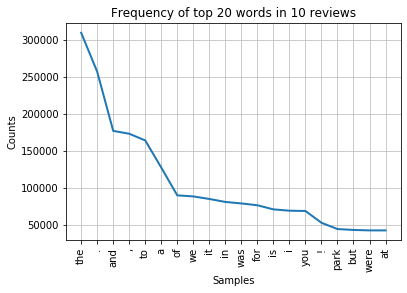

In [36]:
print ('Ten most common words and their frequencies:')
print(disney_fdist.most_common(10))

disney_fdist.plot(20, title = 'Frequency of top 20 words in 10 reviews')
plt.show()

Zipf's Law: The idea is, non content words such as "a", "the", and "it" are extremely common in language data and can outweigh other words that may mattermore for an analysis.
Use nltk's stopwords list to filter them out

In [37]:
import string
from nltk.corpus import stopwords

#pull out stopwords needed for filtering
stop_words = set(stopwords.words("english"))

df = pd.read_csv('DisneylandReviews.csv', encoding = 'iso-8859-1', na_values = 'missing')
df = df.head()

#make a list to store all the tokenized reviews
review_tokens = []
#cycles through each review
for review in df['Review_Text']:
    #strips review of punctuation, then tokenizes it
    review = review.translate(str.maketrans('','', string.punctuation))
    word_tokens = word_tokenize(review)
    #filters out stopwords from token list and appends clean list
    filtered = [word for word in word_tokens if word.lower() not in stop_words]
    review_tokens.append(filtered)

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
#create new column containing the tokenized reviews and print an example review
df['Token_Review'] = review_tokens
print ('Original Review: \n' +df.loc[0, 'Review_Text'])
print ('\nTokenized Review: ')
print (df.loc[0, 'Token_Review'])

Original Review: 
If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 

Tokenized Review: 
['youve', 'ever', 'Disneyland', 'anywhere', 'youll', 'find', 'Disneyland', 'Hong', 'Kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'One', 'rides', 'Small', 'World', 'absolutely', 'fabulous', 'worth', 'day', 'visited', 'fairly', 'hot', 'relatively', 'busy', 'queues', 'moved', 'fairly', 'well']


In [40]:
#creating frequency dictionary 
disney_fdist = FreqDist()
for token_rev in df['Token_Review']:
    for word in token_rev:
        disney_fdist[word.lower()] +=1
        

Ten most common words and their frequencies:
[('disneyland', 6), ('n', 6), ('really', 6), ('park', 5), ('time', 4), ('hk', 4), ('like', 4), ('main', 3), ('feel', 3), ('hot', 3)]


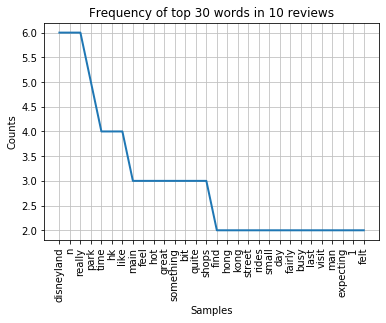

In [43]:
print ('Ten most common words and their frequencies:')
print(disney_fdist.most_common(10))

disney_fdist.plot(30, title = 'Frequency of top 30 words in 10 reviews')
plt.show()